# Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Load Dataset

In [2]:
df=pd.read_csv('cardiac_arrest_data.csv')

In [3]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [4]:
df.shape

(889, 13)

<AxesSubplot:>

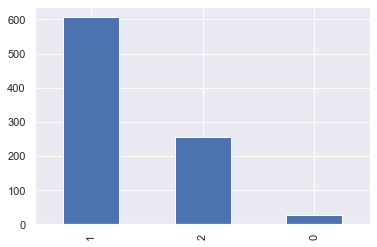

In [5]:
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

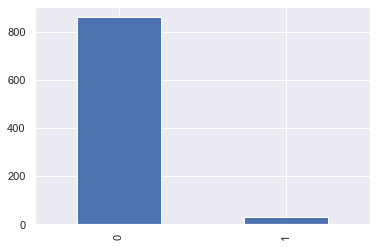

In [6]:
df['Respiratory_illness'].value_counts().plot(kind='bar')

<AxesSubplot:>

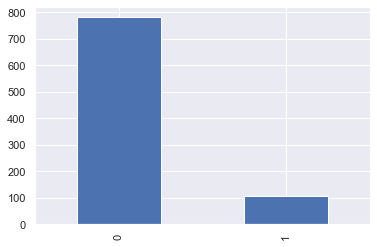

In [7]:
df['Chain_smoker'].value_counts().plot(kind='bar')

<AxesSubplot:>

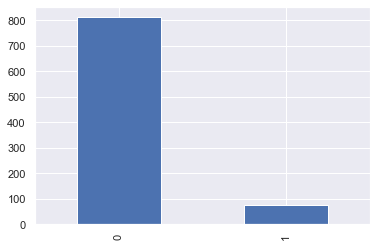

In [8]:
df['HighBP'].value_counts().plot(kind='bar')

# Basic info of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

# Basic Statistics

In [10]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.shape

(889, 13)

# Drop UnderRisk column

In [12]:
df.drop('UnderRisk',axis=1,inplace=True)

# Select K value for label

Text(0.5, 1.0, 'Elbow method for k')

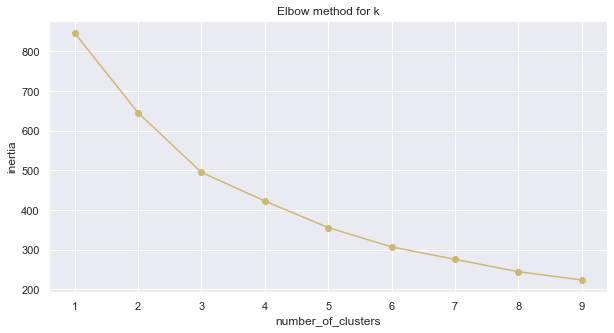

In [13]:
points=[]
n=range(1,10)
for i in n:
    kmeans=KMeans(n_clusters=i).fit(df)
    points.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(n,points,'yo-')
plt.xlabel('number_of_clusters')
plt.ylabel('inertia')
plt.title('Elbow method for k')

# Fit algorithms

In [14]:

y_pred=KMeans(n_clusters=6, max_iter=800).fit_predict(df)


# Model Evaluation

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(df,y_pred)

0.5778333923708188

# Plot Dendogram

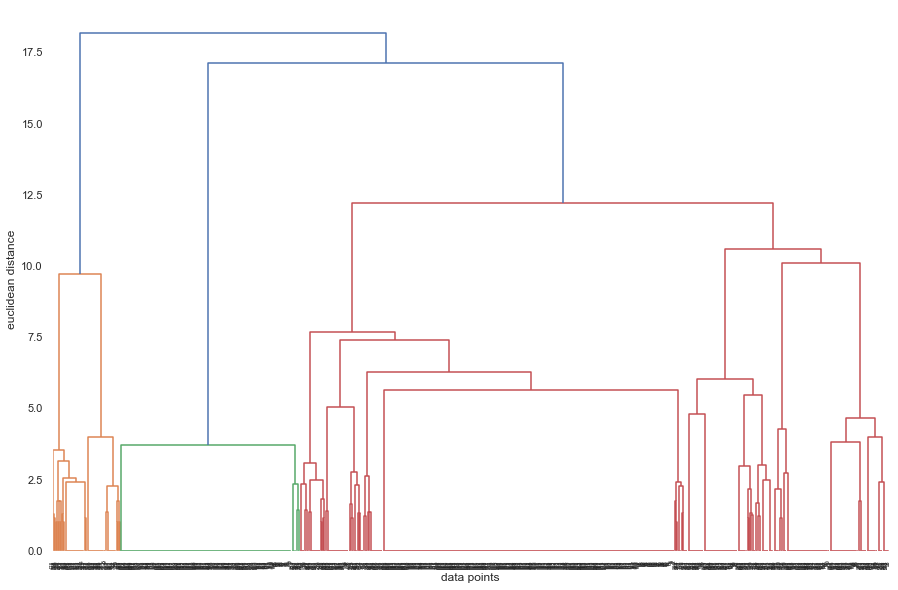

In [16]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
plt.figure(figsize=(15,10))
dendrogram(merg)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.xticks(rotation=90) 
plt.show()

# Apply hierarchy clustering algorithm

In [17]:
agg=AgglomerativeClustering(6)
y_pred=agg.fit_predict(df)

# MOdel Evaluation

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(df,y_pred)

0.558543462323678